<a href="https://colab.research.google.com/github/shreya139/MiningMavericks/blob/Mayank-Gour/CP03_Task1_most_sixes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ICC Cricket World Cup 2023 ML Challange**

### **Task 1**
Predicting the batsman who will hit most sixes in the tournament.

**DATASET**
The source of this dataset is [Cricsheet](https://cricsheet.org/). Cricsheet provides ball and ball data for most cricket tournaments.

IMPORTING LIBRARIES

In [462]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler


In [463]:
df = pd.read_csv("/content/drive/MyDrive/Mining/latest.csv")

##**Pre-Processing**

In [464]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

**Column Description**

1. **match_id**: A unique identifier for each cricket match in the dataset.

2. **season**: Denotes the season or year in which the match took place.

3. **start_date**: Represents the date on which the match began.

4. **venue**: Specifies the location or venue where the match was played.

5. **innings**: Indicates the innings number, whether it is the first or second innings of the match.

6. **ball**: Represents the specific ball number within an innings.

7. **batting_team**: Identifies the team that is currently batting.

8. **bowling_team**: Identifies the team that is currently bowling.

9. **striker**: The batsman who is currently facing the delivery.

10. **non_striker**: The batsman who is at the non-striker's end during the current delivery.

11. **bowler**: The player who is currently bowling the delivery.

12. **runs_off_bat**: The number of runs scored by the batsman off the bat on a particular delivery.

13. **extras**: Additional runs scored that are not attributed to the batsman, such as wides, no-balls, etc.

14. **wides**: The number of wide deliveries bowled by the bowler.

15. **noballs**: The number of no-balls bowled by the bowler.

16. **byes**: Runs scored as byes by the batting team.

17. **legbyes**: Runs scored as leg-byes by the batting team.

18. **penalty**: Any penalty runs awarded during the delivery.

19. **wicket_type**: Describes the type of wicket if a wicket falls on that delivery (e.g., caught, bowled).

20. **player_dismissed**: Specifies the batsman who got dismissed on that delivery.

21. **other_wicket_type**: Additional details on the type of wicket, if applicable.

22. **other_player_dismissed**: Specifies the player involved in any other type of dismissal, if applicable.

In [465]:
df.head(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [466]:
df.isnull().sum()

match_id                      0
season                        0
start_date                    0
venue                         0
innings                       0
ball                          0
batting_team                  0
bowling_team                  0
striker                       0
non_striker                   0
bowler                        0
runs_off_bat                  0
extras                        0
wides                     21999
noballs                   22529
byes                      22547
legbyes                   22414
penalty                   22578
wicket_type               21938
player_dismissed          21938
other_wicket_type         22578
other_player_dismissed    22578
dtype: int64

In [467]:
#creating a wicket column to get boolean of wicket fall
df["wicket"] = df["player_dismissed"].apply(lambda x: 1 if isinstance(x, str) else 0)

In [468]:
#filling na values
df[["wides", "noballs", "byes", "legbyes", "penalty"]] = df[["wides", "noballs", "byes", "legbyes", "penalty"]].fillna(0)

In [469]:
df.wicket_type.fillna("no wicket", inplace=True)

In [470]:
df.wicket_type.value_counts()

no wicket            21938
caught                 393
bowled                 122
lbw                     68
run out                 33
caught and bowled       13
stumped                 11
retired hurt             1
Name: wicket_type, dtype: int64

In [471]:
df.player_dismissed.fillna("no wicket", inplace=True)

In [472]:
df[["other_wicket_type", "other_player_dismissed"]] = df[["other_wicket_type", "other_player_dismissed"]].fillna("no dismissal")

In [473]:
df.isnull().sum()

match_id                  0
season                    0
start_date                0
venue                     0
innings                   0
ball                      0
batting_team              0
bowling_team              0
striker                   0
non_striker               0
bowler                    0
runs_off_bat              0
extras                    0
wides                     0
noballs                   0
byes                      0
legbyes                   0
penalty                   0
wicket_type               0
player_dismissed          0
other_wicket_type         0
other_player_dismissed    0
wicket                    0
dtype: int64

In [474]:
#creating over and balls from ball column which is in 0.1, 0.2 format for first over
df["ball"] = df["ball"].astype(str)
df[["over", "ball_num"]] = df["ball"].str.split(".", expand=True).astype(int)
df["ball"] = df["ball"].astype(float)
df["over"] = df["over"] + 1
df["ball_left"] = 306 - (df["over"]*6 + df["ball_num"])

In [475]:
#creating total runs column to calculate runs on each ball incusive of extras
df["total_runs"] = df["runs_off_bat"] + df["extras"]

In [476]:
#creating innings df so we can merger total runs for each innings with in original df
innings = df.groupby(["match_id", "innings"])["total_runs"].sum().reset_index()
innings.rename(columns={"total_runs":"innings_total"}, inplace=True)

In [477]:
#creating deliveries df and adding total runs
data = df.merge(innings, on=["match_id", "innings"])
data.head(3)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,wicket,over,ball_num,ball_left,total_runs,innings_total
0,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,no wicket,no wicket,no dismissal,no dismissal,0,1,1,299,0,282
1,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,no wicket,no wicket,no dismissal,no dismissal,0,1,2,298,6,282
2,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,no wicket,no wicket,no dismissal,no dismissal,0,1,3,297,1,282


In [478]:
data.wicket_type.value_counts()

no wicket            21938
caught                 393
bowled                 122
lbw                     68
run out                 33
caught and bowled       13
stumped                 11
retired hurt             1
Name: wicket_type, dtype: int64

In [479]:
teams = data.batting_team.unique()
teams

array(['England', 'New Zealand', 'Pakistan', 'Netherlands', 'Afghanistan',
       'Bangladesh', 'South Africa', 'Sri Lanka', 'Australia', 'India'],
      dtype=object)

In [480]:
team_squad = {}
for team in teams:
    player_list = data[data['batting_team'] == team]['striker'].unique().tolist()
    player_list = data[data['batting_team'] == team]['non_striker'].unique().tolist()
    team_squad[team] = player_list
print(team_squad, end=' ')

{'England': ['DJ Malan', 'JM Bairstow', 'JE Root', 'HC Brook', 'MM Ali', 'JC Buttler', 'LS Livingstone', 'SM Curran', 'CR Woakes', 'AU Rashid', 'MA Wood', 'RJW Topley', 'BA Stokes', 'DJ Willey', 'AAP Atkinson'], 'New Zealand': ['WA Young', 'DP Conway', 'R Ravindra', 'DJ Mitchell', 'TWM Latham', 'GD Phillips', 'MS Chapman', 'MJ Santner', 'MJ Henry', 'KS Williamson', 'LH Ferguson', 'JDS Neesham', 'TA Boult', 'TG Southee'], 'Pakistan': ['Imam-ul-Haq', 'Fakhar Zaman', 'Babar Azam', 'Mohammad Rizwan', 'Saud Shakeel', 'Iftikhar Ahmed', 'Mohammad Nawaz', 'Shadab Khan', 'Shaheen Shah Afridi', 'Haris Rauf', 'Abdullah Shafique', 'Hasan Ali', 'Usama Mir', 'Mohammad Wasim'], 'Netherlands': ["MP O'Dowd", 'Vikramjit Singh', 'CN Ackermann', 'BFW de Leede', 'AT Nidamanuru', 'Saqib Zulfiqar', 'RE van der Merwe', 'LV van Beek', 'A Dutt', 'PA van Meekeren', 'SA Edwards', 'SA Engelbrecht', 'R Klein', 'W Barresi', 'Shariz Ahmad'], 'Afghanistan': ['Ibrahim Zadran', 'Rahmanullah Gurbaz', 'Rahmat Shah', 'Hash

In [481]:
venue = data['venue'].unique()
venue

array(['Narendra Modi Stadium, Ahmedabad',
       'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
       'Himachal Pradesh Cricket Association Stadium, Dharamsala',
       'Arun Jaitley Stadium, Delhi',
       'MA Chidambaram Stadium, Chepauk, Chennai',
       'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow',
       'Maharashtra Cricket Association Stadium, Pune',
       'M Chinnaswamy Stadium, Bengaluru', 'Wankhede Stadium, Mumbai',
       'Eden Gardens, Kolkata'], dtype=object)

In [482]:
date_format = '%Y-%m-%d'
data['start_date']= pd.to_datetime(data['start_date'], errors='ignore')

<ipython-input-482-6218d3569e7d>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['start_date']= pd.to_datetime(data['start_date'], errors='ignore')


In [483]:
# calculating cumulative runs for each player
data = data.sort_values(by=['match_id','innings','over', 'ball_num'])

In [484]:
data.head(3)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,wicket,over,ball_num,ball_left,total_runs,innings_total
0,1,2023/24,2023-05-10,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,no wicket,no wicket,no dismissal,no dismissal,0,1,1,299,0,282
1,1,2023/24,2023-05-10,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,no wicket,no wicket,no dismissal,no dismissal,0,1,2,298,6,282
2,1,2023/24,2023-05-10,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,no wicket,no wicket,no dismissal,no dismissal,0,1,3,297,1,282


In [485]:
# Calculate the cumulative run count for each batsman
data['Cumulative_Runs'] = data.groupby(['striker', 'match_id'])['runs_off_bat'].cumsum()

In [486]:
# Calculate Number of Balls Played by batsman
data['Num_Balls_Played'] = data.groupby(['striker', 'match_id']).cumcount() + 1

In [487]:
# Calculate the strike rate for each row
data['Strike_Rate'] = round(
    (data['Cumulative_Runs'] / data['Num_Balls_Played']) * 100, 2)

In [488]:
data.head(3)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,other_player_dismissed,wicket,over,ball_num,ball_left,total_runs,innings_total,Cumulative_Runs,Num_Balls_Played,Strike_Rate
0,1,2023/24,2023-05-10,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,no dismissal,0,1,1,299,0,282,0,1,0.00
1,1,2023/24,2023-05-10,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,no dismissal,0,1,2,298,6,282,6,2,300.00
2,1,2023/24,2023-05-10,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,no dismissal,0,1,3,297,1,282,7,3,233.33


so know we have to find the batsman with the most sixes from the above dataframe.The result is upto 10 November Matches

In [489]:
# Assuming DataFrame is named sixes_count_by_striker
sixes_count_by_striker = data[data['runs_off_bat'] == 6].groupby('striker')['runs_off_bat'].count().reset_index()
sixes_count_by_striker.columns = ['striker', 'six_count']
sixes_count_by_striker = sixes_count_by_striker.sort_values(by='six_count', ascending=False)
sixes_count_by_striker

,striker,six_count
24,GJ Maxwell,22
76,RG Sharma,22
72,Q de Kock,21
15,DA Warner,20
21,Fakhar Zaman,18
...,...,...
62,Mohammad Nabi,1
22,G Coetzee,1
75,RE van der Merwe,1
65,Mohammad Wasim,1


Up until November 10 in the ICC World Cup 2023 dataset, the analysis reveals RG Sharma and GJ Maxwell as the top six-hitter with 22 Sixes

Now creating new dataset which consist of sixes hit by batsman in each match (each row represent one match)

In [490]:
df1 = data[['match_id','striker','venue','batting_team','Num_Balls_Played','wicket_type','Strike_Rate','runs_off_bat']]
df1

,match_id,striker,venue,batting_team,Num_Balls_Played,wicket_type,Strike_Rate,runs_off_bat
0,1,JM Bairstow,"Narendra Modi Stadium, Ahmedabad",England,1,no wicket,0.00,0
1,1,JM Bairstow,"Narendra Modi Stadium, Ahmedabad",England,2,no wicket,300.00,6
2,1,JM Bairstow,"Narendra Modi Stadium, Ahmedabad",England,3,no wicket,233.33,1
3,1,DJ Malan,"Narendra Modi Stadium, Ahmedabad",England,1,no wicket,100.00,1
4,1,JM Bairstow,"Narendra Modi Stadium, Ahmedabad",England,4,no wicket,275.00,4
...,...,...,...,...,...,...,...,...
22574,42,AL Phehlukwayo,"Narendra Modi Stadium, Ahmedabad",South Africa,37,no wicket,62.16,1
22575,42,HE van der Dussen,"Narendra Modi Stadium, Ahmedabad",South Africa,97,no wicket,78.35,2
22576,42,AL Phehlukwayo,"Narendra Modi Stadium, Ahmedabad",South Africa,38,no wicket,76.32,6
22577,42,AL Phehlukwayo,"Narendra Modi Stadium, Ahmedabad",South Africa,39,no wicket,84.62,4


In [491]:
df2 = df1.groupby(['match_id', 'striker'])

def custom_agg(group):
    max_balls_played_index = group['Num_Balls_Played'].idxmax()
    total_six = group[group['runs_off_bat'] == 6].groupby('striker')['runs_off_bat'].count().sum()

    return pd.Series({
        'batting_team': group.loc[max_balls_played_index, 'batting_team'],
        'Num_Balls_Played': group.loc[max_balls_played_index, 'Num_Balls_Played'],
        'venue': group.loc[max_balls_played_index, 'venue'],
        'wicket_type': group.loc[max_balls_played_index, 'wicket_type'],
        'Strike_Rate': group['Strike_Rate'].mean(),
        'Total_Six': total_six,
    })

match = df2.apply(custom_agg).reset_index()


In [492]:
# Convert 'Total_Six' to numeric data type (integer)
match['Total_Six'] = match['Total_Six'].astype(int)

In [493]:
match

,match_id,striker,batting_team,Num_Balls_Played,venue,wicket_type,Strike_Rate,Total_Six
0,1,AU Rashid,England,14,"Narendra Modi Stadium, Ahmedabad",no wicket,83.198571,1
1,1,CR Woakes,England,12,"Narendra Modi Stadium, Ahmedabad",caught,100.390000,0
2,1,DJ Malan,England,25,"Narendra Modi Stadium, Ahmedabad",caught,54.434400,0
3,1,DP Conway,New Zealand,122,"Narendra Modi Stadium, Ahmedabad",no wicket,123.566311,3
4,1,HC Brook,England,16,"Narendra Modi Stadium, Ahmedabad",caught,107.076250,1
...,...,...,...,...,...,...,...,...
759,42,Q de Kock,South Africa,47,"Narendra Modi Stadium, Ahmedabad",lbw,101.532553,3
760,42,Rahmanullah Gurbaz,Afghanistan,22,"Narendra Modi Stadium, Ahmedabad",caught,82.213182,1
761,42,Rahmat Shah,Afghanistan,47,"Narendra Modi Stadium, Ahmedabad",caught,39.407660,0
762,42,Rashid Khan,Afghanistan,31,"Narendra Modi Stadium, Ahmedabad",caught,39.540000,0


In [494]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          764 non-null    int64  
 1   striker           764 non-null    object 
 2   batting_team      764 non-null    object 
 3   Num_Balls_Played  764 non-null    int64  
 4   venue             764 non-null    object 
 5   wicket_type       764 non-null    object 
 6   Strike_Rate       764 non-null    float64
 7   Total_Six         764 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 47.9+ KB


Adding details manually for the cricket fixtures on November 11, 2023, between Bangladesh and Australia, as well as England and Pakistan. Additionally, including information for the match between India and Netherlands on November 12, 2023.

**Featues Format**: 'match_id','striker','venue','batting_team','bowling_team','Num_Balls_Played','wicket_type','Strike_Rate',Total_Six

Bangladesh V/s Australia

In [495]:

Bangladesh = [['43', 'Tanzim Hasan Sakib','Maharashtra Cricket Association Stadium, Pune', 'Bangladesh', 34, 'Out', 105.9, 0],
              ['43', 'Liton Das', 'Maharashtra Cricket Association Stadium, Pune','Bangladesh', 45, 'Out', 80.0, 0],
              ['43', 'Nazmul Hossain Shanto','Maharashtra Cricket Association Stadium, Pune', 'Bangladesh', 57, 'Out', 78.9, 0],
              ['43', 'Towhid Hridoy', 'Maharashtra Cricket Association Stadium, Pune','Bangladesh', 79, 'Out', 93.7, 2],
              ['43', 'Mahmudullah', 'Maharashtra Cricket Association Stadium, Pune','Bangladesh', 28, 'Out', 114.3, 3],
              ['43', 'Mushfiqur Rahim', 'Maharashtra Cricket Association Stadium, Pune','Bangladesh', 24, 'Out', 87.5, 1],
              ['43', 'Mehedi Hasan Miraz','Maharashtra Cricket Association Stadium, Pune', 'Bangladesh', 20, 'Out', 145.0, 0],
              ['43', 'Nasum Ahmed', 'Maharashtra Cricket Association Stadium, Pune','Bangladesh', 11, 'Out', 63.6, 0],
              ['43', 'Mahedi Hasan', 'Maharashtra Cricket Association Stadium, Pune','Bangladesh', 3, 'Not Out', 66.7, 0],
              ['43', 'Taskin Ahmed','Maharashtra Cricket Association Stadium, Pune', 'Bangladesh', 1, 'Not Out', 0.0, 0]]


Australia = [['43', 'TM Head','Maharashtra Cricket Association Stadium, Pune', 'Australia', 11, 'Out', 90.9, 0],
             ['43', 'DA Warner','Maharashtra Cricket Association Stadium, Pune', 'Australia', 61, 'Out', 86.9, 0],
             ['43', 'MR Marsh','Maharashtra Cricket Association Stadium, Pune', 'Australia', 132, 'Not Out', 134.1, 9],
             ['43', 'SPD Smith','Maharashtra Cricket Association Stadium, Pune', 'Australia', 64, 'Not Out', 98.4, 1]]


England Vs Pakistan 11 November

In [496]:
England = [['44', 'DJ Malan','Eden Gardens, Kolkata', 'England', 39, 'Out', 79.5, 0],
           ['44', 'JM Bairstow','Eden Gardens, Kolkata', 'England', 61, 'Out', 96.7, 1],
           ['44', 'JE Root','Eden Gardens, Kolkata', 'England', 72, 'Out', 83.3, 0],
           ['44', 'BA Stokes','Eden Gardens, Kolkata', 'England', 76, 'Out', 110.5, 2],
           ['44', 'JC Buttler','Eden Gardens, Kolkata', 'England', 18, 'Out', 150, 1],
           ['44', 'HC Brook','Eden Gardens, Kolkata', 'England', 17, 'Out', 176.5, 2],
           ['44', 'MM Ali','Eden Gardens, Kolkata', 'England', 6, 'Out', 133.3, 1],
           ['44', 'CR Woakes','Eden Gardens, Kolkata', 'England', 4, 'Not Out', 100, 0],
           ['44', 'DJ Willey','Eden Gardens, Kolkata', 'England', 5, 'Out', 300, 1],
           ['44', 'AAP Atkinson','Eden Gardens, Kolkata', 'England', 1, 'Out', 0.0, 0],
           ['44', 'AU Rashid','Eden Gardens, Kolkata', 'England', 1, 'Not Out', 0.0, 0]]

Pakistan = [['44', 'Abdullah Shafique','Eden Gardens, Kolkata', 'Pakistan', 2, 'Out', 0, 0],
            ['44', 'Fakhar Zaman','Eden Gardens, Kolkata', 'Pakistan', 9, 'Out', 11.1, 0],
            ['44', 'Babar Azam','Eden Gardens, Kolkata', 'Pakistan', 45, 'Out', 84.4, 0],
            ['44', 'Mohammad Rizwan','Eden Gardens, Kolkata', 'Pakistan', 51, 'Out', 70.6, 0],
            ['44', 'Saud Shakeel','Eden Gardens, Kolkata', 'Pakistan', 37, 'Out', 78.4, 0],
            ['44', 'Agha Salman','Eden Gardens, Kolkata', 'Pakistan', 45, 'Out', 113.3, 1],
            ['44', 'Iftikhar Ahmed','Eden Gardens, Kolkata', 'Pakistan', 5, 'Out', 60, 0],
            ['44', 'Shadab Khan','Eden Gardens, Kolkata', 'Pakistan', 7, 'Out', 57.1, 0],
            ['44', 'Shaheen Shah Afridi','Eden Gardens, Kolkata', 'Pakistan', 23, 'Out', 108.7, 1],
            ['44', 'Mohammad Wasim','Eden Gardens, Kolkata', 'Pakistan', 14, 'Not Out', 114.3, 1],
            ['44', 'Haris Rauf','Eden Gardens, Kolkata', 'Pakistan', 23, 'Out', 152.2, 3]]

India Vs Netherland 12 November

In [497]:
India = [['45', 'RG Sharma','M Chinnaswamy Stadium, Bengaluru', 'India', 54, 'Out', 113, 2],
         ['45', 'Shubman Gill','M Chinnaswamy Stadium, Bengaluru', 'India', 32, 'Out', 159.4, 4],
         ['45', 'V Kohli','M Chinnaswamy Stadium, Bengaluru', 'India', 56, 'Out', 91.1, 1],
         ['45', 'SS Iyer','M Chinnaswamy Stadium, Bengaluru', 'India', 94, 'Not Out', 136.2, 5],
         ['45', 'KL Rahul','M Chinnaswamy Stadium, Bengaluru', 'India', 64, 'Out', 159.4, 4],
         ['45', 'SA Yadav','M Chinnaswamy Stadium, Bengaluru', 'India', 1, 'Not Out', 200, 0]]

Netherlands = [['45', 'W Barresi','M Chinnaswamy Stadium, Bengaluru', 'Netherlands', 5, 'Out', 80, 0],
               ['45', "MP O'Dowd",'M Chinnaswamy Stadium, Bengaluru', 'Netherlands', 42, 'Out', 71.4, 1],
               ['45', 'CN Ackermann','M Chinnaswamy Stadium, Bengaluru', 'Netherlands', 32, 'Out', 109.4, 0],
               ['45', 'SA Engelbrecht','M Chinnaswamy Stadium, Bengaluru', 'Netherlands', 80, ' Out', 56.3, 0],
               ['45', 'SA Edwards','M Chinnaswamy Stadium, Bengaluru', 'Netherlands', 30, 'Out', 56.7, 0],
               ['45', 'BFW de Leede','M Chinnaswamy Stadium, Bengaluru', 'Netherlands', 21, 'Out', 57.1, 0],
               ['45', 'AT Nidamanuru','M Chinnaswamy Stadium, Bengaluru', 'Netherlands', 39, 'Out', 138.5, 6],
               ['45', 'LV van Beek','M Chinnaswamy Stadium, Bengaluru', 'Netherlands', 15, 'Out', 106.7, 0],
               ['45', 'RE van der Merwe','M Chinnaswamy Stadium, Bengaluru', 'Netherlands', 8, 'Out', 200, 2],
               ['45', 'A Dutt','M Chinnaswamy Stadium, Bengaluru', 'Netherlands', 11, 'Out', 45.5, 0],
               ['45', 'PA van Meekeren','M Chinnaswamy Stadium, Bengaluru', 'Netherlands', 4, 'Not Out', 75, 0]]

In [498]:
columns = ['match_id','striker','venue','batting_team','Num_Balls_Played','wicket_type','Strike_Rate','Total_Six']

Bangladesh = pd.DataFrame(Bangladesh, columns=columns)
Australia = pd.DataFrame(Australia, columns=columns)
England = pd.DataFrame(England, columns=columns)
Pakistan = pd.DataFrame(Pakistan, columns=columns)
India = pd.DataFrame(India, columns=columns)
Australia = pd.DataFrame(Australia, columns=columns)

In [499]:
match = pd.concat([match, Bangladesh, Australia, England, Pakistan, India, Australia], axis=0, ignore_index=True).drop_duplicates().reset_index(drop=True)

In [500]:
match.sort_values(by=['Total_Six'],ascending = False)

,match_id,striker,batting_team,Num_Balls_Played,venue,wicket_type,Strike_Rate,Total_Six
625,35,Fakhar Zaman,Pakistan,83,"M Chinnaswamy Stadium, Bengaluru",no wicket,125.764096,11
692,39,GJ Maxwell,Australia,130,"Wankhede Stadium, Mumbai",no wicket,108.610308,10
776,43,MR Marsh,Australia,132,"Maharashtra Cricket Association Stadium, Pune",Not Out,134.100000,9
321,18,MR Marsh,Australia,111,"M Chinnaswamy Stadium, Bengaluru",caught,98.115586,9
310,18,DA Warner,Australia,131,"M Chinnaswamy Stadium, Bengaluru",caught,105.890305,9
...,...,...,...,...,...,...,...,...
324,18,PJ Cummins,Australia,8,"M Chinnaswamy Stadium, Bengaluru",no wicket,52.560000,0
325,18,SPD Smith,Australia,10,"M Chinnaswamy Stadium, Bengaluru",caught and bowled,75.159000,0
326,18,Saud Shakeel,Pakistan,34,"M Chinnaswamy Stadium, Bengaluru",caught,64.718824,0
327,18,Shaheen Shah Afridi,Pakistan,8,"M Chinnaswamy Stadium, Bengaluru",caught,80.773750,0


In [501]:
dummies = pd.get_dummies(match['wicket_type'], dtype=int)
match = pd.concat([dummies, match], axis=1)

In [502]:
match.drop(['wicket_type'], axis=1, inplace=True)
match.head(3)

,Not Out,Out,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,match_id,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Six
0,0,0,0,0,0,0,1,0,0,1,AU Rashid,England,14,"Narendra Modi Stadium, Ahmedabad",83.198571,1
1,0,0,0,1,0,0,0,0,0,1,CR Woakes,England,12,"Narendra Modi Stadium, Ahmedabad",100.390000,0
2,0,0,0,1,0,0,0,0,0,1,DJ Malan,England,25,"Narendra Modi Stadium, Ahmedabad",54.434400,0


Given that the semi-finalists are India, South Africa, Australia, and New Zealand, we will focus our analysis on batsmen from these teams. It's evident that only players from these teams have the opportunity to continue playing and potentially score more sixes in the upcoming matches.

In [503]:
semi_teams = ['India','South Africa','New Zealand','Australia']

In [504]:
Most_six_batsmen = match[match['batting_team'].isin(semi_teams)]

In [505]:
Most_six_batsmen.head(5)

,Not Out,Out,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,match_id,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Six
3,0,0,0,0,0,0,1,0,0,1,DP Conway,New Zealand,122,"Narendra Modi Stadium, Ahmedabad",123.566311,3
11,0,0,0,0,0,0,1,0,0,1,R Ravindra,New Zealand,98,"Narendra Modi Stadium, Ahmedabad",117.910306,5
13,0,0,0,1,0,0,0,0,0,1,WA Young,New Zealand,1,"Narendra Modi Stadium, Ahmedabad",0.000000,0
53,0,0,0,1,0,0,0,0,0,4,AK Markram,South Africa,57,"Arun Jaitley Stadium, Delhi",134.190000,3
57,0,0,0,0,0,0,1,0,0,4,DA Miller,South Africa,24,"Arun Jaitley Stadium, Delhi",138.587083,2


In [506]:
batsmen_list = Most_six_batsmen.groupby('striker')['Total_Six'].sum().reset_index()

In [507]:
batsmen_list

,striker,Total_Six
0,A Zampa,0
1,AK Markram,9
2,AL Phehlukwayo,3
3,AT Carey,0
4,C Green,0
5,DA Miller,15
6,DA Warner,20
7,DJ Mitchell,15
8,DP Conway,4
9,G Coetzee,1


# **Label Encoding**

In [508]:
striker_decoded = match['striker']
batting_decoded = match['batting_team']
venue_decoded = match['venue']


In [509]:
def transform_cols(x):
    le = LabelEncoder()
    x_encoded = le.fit_transform(x) + 1
    return x_encoded, le

In [510]:
def inverse_transform_cols(x, le):
    x = x - 1
    x_inverse = le.inverse_transform(x)
    return x_inverse

In [511]:
encoders = {}
encode_cols = ['striker', 'batting_team','venue']

for col in encode_cols:
    match[col], encoders[col] = transform_cols(match[col])

In [512]:
striker_encoded = match['striker']
batting_encoded = match['batting_team']
venue_encoded = match['venue']

In [513]:
selected_batsmen = batsmen_list['striker'].tolist()
selected_batsmen

['A Zampa',
 'AK Markram',
 'AL Phehlukwayo',
 'AT Carey',
 'C Green',
 'DA Miller',
 'DA Warner',
 'DJ Mitchell',
 'DP Conway',
 'G Coetzee',
 'GD Phillips',
 'GJ Maxwell',
 'H Klaasen',
 'HE van der Dussen',
 'HH Pandya',
 'Ishan Kishan',
 'JDS Neesham',
 'JJ Bumrah',
 'JP Inglis',
 'JR Hazlewood',
 'K Rabada',
 'KA Maharaj',
 'KL Rahul',
 'KS Williamson',
 'Kuldeep Yadav',
 'L Ngidi',
 'LH Ferguson',
 'M Jansen',
 'M Labuschagne',
 'MA Starc',
 'MJ Henry',
 'MJ Santner',
 'MP Stoinis',
 'MR Marsh',
 'MS Chapman',
 'Mohammed Shami',
 'PJ Cummins',
 'Q de Kock',
 'R Ravindra',
 'RA Jadeja',
 'RG Sharma',
 'RR Hendricks',
 'SA Yadav',
 'SPD Smith',
 'SS Iyer',
 'Shubman Gill',
 'T Bavuma',
 'T Shamsi',
 'TA Boult',
 'TG Southee',
 'TM Head',
 'TWM Latham',
 'V Kohli',
 'WA Young']

In [514]:
batsmen_map = {}


batsmen_map = {decoded: encoded for decoded, encoded in zip(striker_decoded, striker_encoded) if decoded in selected_batsmen}

batsmen_map

{'DP Conway': 31,
 'R Ravindra': 107,
 'WA Young': 145,
 'AK Markram': 5,
 'DA Miller': 24,
 'H Klaasen': 38,
 'HE van der Dussen': 40,
 'M Jansen': 69,
 'Q de Kock': 105,
 'T Bavuma': 131,
 'A Zampa': 2,
 'AT Carey': 7,
 'C Green': 17,
 'DA Warner': 25,
 'GJ Maxwell': 37,
 'HH Pandya': 41,
 'Ishan Kishan': 50,
 'JR Hazlewood': 57,
 'KL Rahul': 61,
 'M Labuschagne': 70,
 'MA Starc': 73,
 'MR Marsh': 83,
 'PJ Cummins': 103,
 'RG Sharma': 110,
 'SPD Smith': 121,
 'SS Iyer': 122,
 'V Kohli': 142,
 'DJ Mitchell': 27,
 'GD Phillips': 36,
 'MJ Henry': 78,
 'MJ Santner': 79,
 'MS Chapman': 84,
 'TWM Latham': 136,
 'JP Inglis': 56,
 'K Rabada': 58,
 'KA Maharaj': 59,
 'MP Stoinis': 82,
 'KS Williamson': 62,
 'Shubman Gill': 130,
 'G Coetzee': 35,
 'L Ngidi': 64,
 'RR Hendricks': 112,
 'LH Ferguson': 65,
 'Mohammed Shami': 92,
 'RA Jadeja': 108,
 'SA Yadav': 119,
 'TA Boult': 133,
 'T Shamsi': 132,
 'JDS Neesham': 52,
 'TM Head': 135,
 'JJ Bumrah': 54,
 'Kuldeep Yadav': 63,
 'TG Southee': 134,


In [515]:
venue_map = {}


venue_map = {decoded: encoded for decoded, encoded in zip(venue_decoded, venue_encoded)}

venue_map

{'Narendra Modi Stadium, Ahmedabad': 8,
 'Rajiv Gandhi International Stadium, Uppal, Hyderabad': 9,
 'Himachal Pradesh Cricket Association Stadium, Dharamsala': 4,
 'Arun Jaitley Stadium, Delhi': 1,
 'MA Chidambaram Stadium, Chepauk, Chennai': 6,
 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow': 2,
 'Maharashtra Cricket Association Stadium, Pune': 7,
 'M Chinnaswamy Stadium, Bengaluru': 5,
 'Wankhede Stadium, Mumbai': 10,
 'Eden Gardens, Kolkata': 3}

In [516]:
teams_map = {}
teams_map = {decoded: encoded for decoded, encoded in zip(batting_decoded, batting_encoded) if decoded in semi_teams}
teams_map

{'New Zealand': 7, 'South Africa': 9, 'Australia': 2, 'India': 5}

In [517]:
Most_six_batsmen = Most_six_batsmen.copy()

In [518]:
Most_six_batsmen['striker'] = Most_six_batsmen['striker'].map(batsmen_map)

In [519]:
Most_six_batsmen['batting_team'] = Most_six_batsmen['batting_team'].map(teams_map)

In [520]:
Most_six_batsmen['venue'] = Most_six_batsmen['venue'].map(venue_map)

In [521]:
Most_six_batsmen.head(3)

,Not Out,Out,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,match_id,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Six
3,0,0,0,0,0,0,1,0,0,1,31,7,122,8,123.566311,3
11,0,0,0,0,0,0,1,0,0,1,107,7,98,8,117.910306,5
13,0,0,0,1,0,0,0,0,0,1,145,7,1,8,0.000000,0


# **Modeling**


Using LSTM for predicting the number of sixes hit by a batsman in the ICC World Cup is appropriate because cricket match data is inherently sequential, with ball-by-ball events influencing a batsman's performance, and LSTMs excel at capturing patterns in sequential data with long-term dependencies.

In [522]:
match.drop(['match_id'],axis=1, inplace = True)
Most_six_batsmen.drop(['match_id'],axis=1, inplace = True)

In [523]:
# Normalizing numeric columns
scaler = MinMaxScaler()
match[['Num_Balls_Played', 'Strike_Rate', 'Total_Six']] = scaler.fit_transform(match[['Num_Balls_Played', 'Strike_Rate', 'Total_Six']])

In [524]:
sequence_length = 3
X, y = [], []

for i in range(len(match) - sequence_length):
    X.append(match.iloc[i:i+sequence_length, :-1])
    y.append(match.iloc[i+sequence_length-1, -1])

X, y = np.array(X), np.array(y)

In [525]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [526]:
# Build the neural network model
model = Sequential()

In [527]:
# Build LSTM Model
model.add(LSTM(units=70, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))

In [528]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [529]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [530]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [531]:
history = model.fit(X_train, y_train, epochs=30, batch_size=40, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/30
17/17 [==============================] - 3s 33ms/step - loss: 8.0853 - val_loss: 1.6493
Epoch 2/30
17/17 [==============================] - 0s 11ms/step - loss: 0.7710 - val_loss: 0.4200
Epoch 3/30
17/17 [==============================] - 0s 11ms/step - loss: 0.1905 - val_loss: 0.1426
Epoch 4/30
17/17 [==============================] - 0s 11ms/step - loss: 0.1153 - val_loss: 0.0737
Epoch 5/30
17/17 [==============================] - 0s 10ms/step - loss: 0.0762 - val_loss: 0.0705
Epoch 6/30
17/17 [==============================] - 0s 11ms/step - loss: 0.0685 - val_loss: 0.0647
Epoch 7/30
17/17 [==============================] - 0s 11ms/step - loss: 0.0614 - val_loss: 0.0580
Epoch 8/30
17/17 [==============================] - 0s 11ms/step - loss: 0.0558 - val_loss: 0.0511
Epoch 9/30
17/17 [==============================] - 0s 14ms/step - loss: 0.0466 - val_loss: 0.0532
Epoch 10/30
17/17 [==============================] - 0s 11ms/step - loss: 0.0481 - val_loss: 0.0444
Epoch 11/

In [532]:
# Extract loss and validation loss from the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

In [533]:
# Plotting
epochs = range(1, len(loss) + 1)

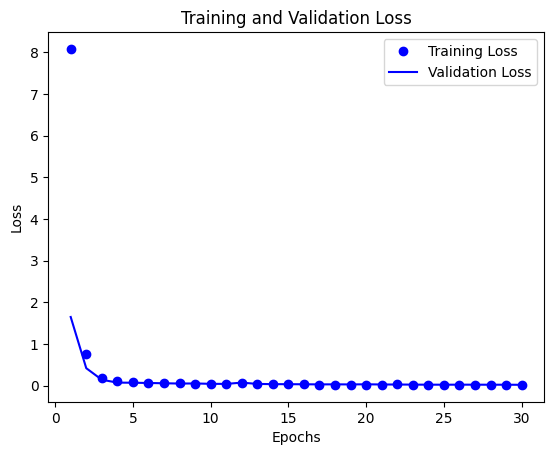

In [534]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Now using trained model to predict the most sixes hitted by each selected Batsmen

In [535]:
selected_batsmen_encoded = Most_six_batsmen['striker'].unique()
print(f"selected_batsmen_encoded: {selected_batsmen_encoded}")

selected_batsmen_encoded: [ 31 107 145   5  24  38  40  69 105 131   2   7  17  25  37  41  50  57
  61  70  73  83 103 110 121 122 142  27  36  78  79  84 136  56  58  59
  82  62 130  35  64 112  65  92 108 119 133 132  52 135  54  63 134   6]


In [536]:
# Function to predict most six for batsmen
def predict_six_for_batsmen(model, Most_six_batsmen, scaler, sequence_length):
    selected_sequences = []
    for batsman in Most_six_batsmen['striker'].unique().tolist():
        batsman_data = Most_six_batsmen[Most_six_batsmen['striker'] == batsman]
        batsman_data = batsman_data.copy()
        batsman_sequence = batsman_data.iloc[-sequence_length:, :-1].values  # Assuming the same features as the model input
        predicted_six = model.predict(np.array([batsman_sequence]))

        avg_values = batsman_data.mean()
        # Not Out	Out	bowled	caught	caught and bowled	lbw	no wicket	run out	stumped	striker	batting_team	Num_Balls_Played	venue	Strike_Rate	Total_Six
        predicted_row = pd.DataFrame({
            'Not Out': [int(avg_values['Not Out'])],
            'Out': [1 - int(avg_values['Not Out'])],
            'bowled': [int(avg_values['bowled'])],
            'caught': [int(avg_values['caught'])],
            'caught and bowled': [int(avg_values['caught and bowled'])],
            'lbw': [int(avg_values['lbw'])],
            'no wicket': [int(avg_values['no wicket'])],
            'run out': [int(avg_values['run out'])],
            'stumped': [int(avg_values['stumped'])],
            'striker': [batsman],
            'batting_team': [int(avg_values['batting_team'])],
            'Num_Balls_Played': [int(avg_values['Num_Balls_Played'])],
            'venue' : [int(avg_values['venue'])],
            'Strike_Rate': [avg_values['Strike_Rate']],
            'Total_Six': int(predicted_six[0]),
        })

        print(predicted_row)
        Most_six_batsmen = pd.concat([Most_six_batsmen, predicted_row], ignore_index=True)

    Most_six_batsmen.sort_values(by='striker', inplace=True)

    return Most_six_batsmen

In [537]:
predicted_semi = predict_six_for_batsmen(model, Most_six_batsmen, scaler, sequence_length)

1/1 [==============================] - 0s 180ms/step
   Not Out  Out  bowled  caught  caught and bowled  lbw  no wicket  run out  \
0        0    1       0       0                  0    0          0        0   

   stumped  striker  batting_team  Num_Balls_Played  venue  Strike_Rate  \
0        0       31             7                40      6    69.475269   

   Total_Six  
0          5  
1/1 [==============================] - 0s 22ms/step
   Not Out  Out  bowled  caught  caught and bowled  lbw  no wicket  run out  \
0        0    1       0       0                  0    0          0        0   

   stumped  striker  batting_team  Num_Balls_Played  venue  Strike_Rate  \
0        0      107             7                59      6    74.585172   

   Total_Six  
0          6  
1/1 [==============================] - 0s 23ms/step
   Not Out  Out  bowled  caught  caught and bowled  lbw  no wicket  run out  \
0        0    1       0       0                  0    0          0        0   

   s

In [538]:
predicted_semi.head(5)

,Not Out,Out,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Six
147,0,0,0,0,0,0,1,0,0,2,2,1,1,100.000000,0
40,0,0,0,0,0,0,1,0,0,2,2,16,2,66.638750,0
168,0,0,1,0,0,0,0,0,0,2,2,3,4,0.000000,0
305,0,1,0,0,0,0,0,0,0,2,2,10,4,62.765633,9
233,0,0,0,1,0,0,0,0,0,2,2,19,8,146.353684,0


54 instances more added through prediction of total sixes scored by each batsman in both the semi finals.Now as or task 2 predicts that final will be between INDIA and South Africa. So i am going to predict the batsmens wise most sixes in final

In [539]:
finale_teams_decoded = ['India', 'South Africa']
finale_teams_encoded = [5, 9]

In [540]:
finale_batsmen = predicted_semi[predicted_semi['batting_team'].isin(finale_teams_encoded)]
finale_batsmen

,Not Out,Out,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Six
41,0,0,0,1,0,0,0,0,0,5,9,46,2,79.666304,1
157,0,0,0,1,0,0,0,0,0,5,9,96,6,112.307500,3
140,0,0,0,1,0,0,0,0,0,5,9,70,10,69.258286,0
199,0,0,0,0,0,0,1,0,0,5,9,1,7,600.000000,1
112,0,0,0,1,0,0,0,0,0,5,9,46,10,99.549783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,0,0,0,1,0,0,0,0,0,142,5,9,2,0.000000,0
39,0,0,0,0,0,0,1,0,0,142,5,57,1,88.002632,0
26,0,0,0,1,0,0,0,0,0,142,5,119,6,54.649748,0
69,0,0,0,1,0,0,0,0,0,142,5,19,8,72.751053,0


In [541]:
finale_batsmen_encoded = finale_batsmen['striker'].unique().tolist()
finale_batsmen_decoded = [batsman for num in finale_batsmen_encoded for batsman, value in batsmen_map.items() if value == num]

In [542]:
predicted_finale = predict_six_for_batsmen(model, finale_batsmen, scaler, sequence_length)

1/1 [==============================] - 0s 22ms/step
   Not Out  Out  bowled  caught  caught and bowled  lbw  no wicket  run out  \
0        0    1       0       0                  0    0          0        0   

   stumped  striker  batting_team  Num_Balls_Played  venue  Strike_Rate  \
0        0        5             9                39      5   152.020231   

   Total_Six  
0         11  
1/1 [==============================] - 0s 26ms/step
   Not Out  Out  bowled  caught  caught and bowled  lbw  no wicket  run out  \
0        0    1       0       0                  0    0          1        0   

   stumped  striker  batting_team  Num_Balls_Played  venue  Strike_Rate  \
0        0        6             9                40      8     45.53225   

   Total_Six  
0          6  
1/1 [==============================] - 0s 23ms/step
   Not Out  Out  bowled  caught  caught and bowled  lbw  no wicket  run out  \
0        0    1       0       0                  0    0          0        0   

   st

In [543]:
predicted_finale

,Not Out,Out,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Six
0,0,0,0,1,0,0,0,0,0,5,9,46,2,79.666304,1
9,0,1,0,0,0,0,0,0,0,5,9,39,5,152.020231,12
8,0,0,0,1,0,0,0,0,0,5,9,57,1,134.190000,3
7,0,0,1,0,0,0,0,0,0,5,9,3,4,61.110000,0
6,0,0,0,1,0,0,0,0,0,5,9,6,3,145.278333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0,0,0,1,0,0,0,0,0,142,5,9,2,0.000000,0
160,0,0,0,0,0,0,1,0,0,142,5,57,1,88.002632,0
161,0,0,0,1,0,0,0,0,0,142,5,119,6,54.649748,0
163,0,1,0,0,0,0,0,0,0,142,5,76,5,75.237830,4


In [544]:
final_df = pd.concat([predicted_semi, predicted_finale], ignore_index=True).drop_duplicates().reset_index(drop=True)

In [545]:
final_df

,Not Out,Out,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Six
0,0,0,0,0,0,0,1,0,0,2,2,1,1,100.000000,0
1,0,0,0,0,0,0,1,0,0,2,2,16,2,66.638750,0
2,0,0,1,0,0,0,0,0,0,2,2,3,4,0.000000,0
3,0,1,0,0,0,0,0,0,0,2,2,10,4,62.765633,9
4,0,0,0,1,0,0,0,0,0,2,2,19,8,146.353684,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,0,1,0,0,0,0,0,0,0,122,5,44,5,84.634255,8
367,0,1,0,0,0,0,0,0,0,130,5,37,5,100.665576,0
368,0,1,0,0,0,0,0,0,0,131,9,28,4,74.042397,3
369,0,1,0,0,0,0,1,0,0,132,9,5,4,94.438393,-3


In [546]:
batsmen_name_map = {v: k for k, v in batsmen_map.items()}
teams_name_map = {v: k for k, v in teams_map.items()}

In [547]:
Most_six_batsmen['striker'] = Most_six_batsmen['striker'].map(batsmen_name_map)
Most_six_batsmen['batting_team'] = Most_six_batsmen['batting_team'].map(teams_name_map)

Top 5 Batsman with most sixes upto 11 November 2023

In [548]:
Most_six_batsmen = Most_six_batsmen.groupby(['striker', 'batting_team'])['Total_Six'].sum().reset_index()
Most_six_batsmen.sort_values(by= ['Total_Six'],ascending = False).head(5)

,striker,batting_team,Total_Six
40,RG Sharma,India,24
11,GJ Maxwell,Australia,22
37,Q de Kock,South Africa,21
33,MR Marsh,Australia,20
6,DA Warner,Australia,20


In [549]:
final_df['striker'] = final_df['striker'].map(batsmen_name_map)
final_df['batting_team'] = final_df['batting_team'].map(teams_name_map)

In [550]:
six_by_batsman = final_df.groupby(['striker', 'batting_team'])['Total_Six'].sum().reset_index()

In [551]:
six_by_batsman.sort_values(by = ['Total_Six'],ascending = False,inplace = True)

#Conclusion

Top 5 Batsman with most sixes at the end of tournament

In [553]:
 top_5_batsmen = six_by_batsman.head(5)
top_5_batsmenb

,striker,batting_team,Total_Six
11,GJ Maxwell,Australia,45
33,MR Marsh,Australia,37
37,Q de Kock,South Africa,37
44,SS Iyer,India,34
40,RG Sharma,India,32


According to our model, GJ Maxwell will hit most sixes